Machine learning - Assignment 2
Laptop price prediction with multiple linear regression

#### Importing libraries

In [1396]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import svm

#### Data importing

In [1397]:
data_df = pd.read_csv('traineddataUpdate.csv')
data_df.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080


#### Prior data visualization

<AxesSubplot:xlabel='Price', ylabel='Count'>

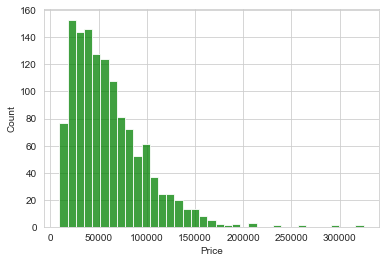

In [1398]:
# Plotting a actual price distribution.
sn.histplot(data_df['Price'],color='green')

C:\Users\Taneesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

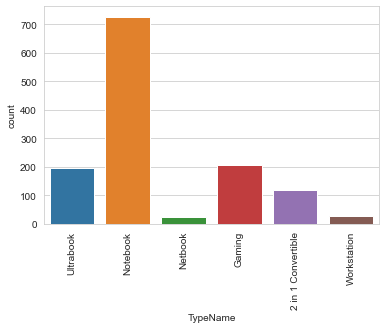

In [1399]:
# Information related to various type of laptops.
sn.countplot(data_df['TypeName'])
plt.xticks(rotation = 'vertical')

C:\Users\Taneesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


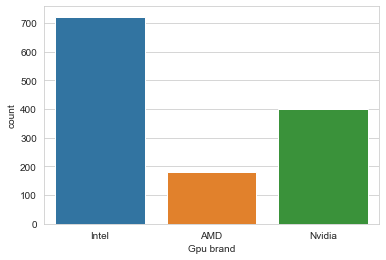

In [1400]:
# Plotting GPU manufacture information.
sn.countplot(data_df['Gpu brand'])
plt.show()


In [1401]:
# Extracting CPU manufacture details from the dataset.
cpu_manufacture = data_df['CPU_name'].str.split(' ',n = 1,expand=True)
cpu_manufacture.head()
data_df['CPU_manufacture'] = cpu_manufacture[0]

<AxesSubplot:ylabel='None'>

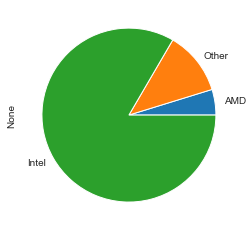

In [1402]:
# Plotting the CPU manufacture details
cpu_value = data_df.value_counts('CPU_manufacture')
cpu_value.sort_values().plot(kind='pie')

#### Data augmentation - Experiment

##### Add LabelEncoder

In [1402]:
labeled_type_name = LabelEncoder()
labeled_comapny_name = LabelEncoder()
labeled_cpu_name = LabelEncoder()

In [1402]:
data_df['Type'] = labeled_type_name.fit_transform(data_df['TypeName'])
data_df['CPU_manufacture_type'] = labeled_comapny_name.fit_transform(data_df['CPU_manufacture'])
data_df['Company_Type'] = labeled_cpu_name.fit_transform(data_df['Company'])

In [1403]:
data_df.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel


In [1404]:
# Check for NULL values before partitioning.
data_df.isnull().sum()


Company            0
TypeName           0
Ram                0
OpSys              0
Weight             0
TouchScreen        0
IPS                0
PPI                0
CPU_name           0
HDD                0
SSD                0
Gpu brand          0
Price              0
CPU_manufacture    0
dtype: int64

#### Define Training and Testing values

In [1405]:
# Define X and Y values.
# x = data_df.drop(['Price', 'Company', 'TypeName', 'OpSys', 'CPU_name', 'CPU_manufacture', 'Gpu brand'], axis=1).values
# y = data_df['Price'].values

# Newer data splitting method.
train = data_df.drop(['Price'], axis=1)
# Only change here is usage of np.log().
testing = np.log(data_df['Price'])

In [1406]:
# Validating the X dataset
train

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,CPU_manufacture
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Intel
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Intel
1298,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Intel
1299,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Other
1300,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Intel


In [1407]:
# Validating the Y dataset
testing

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1297    10.433899
1298    11.288115
1299     9.409283
1300    10.614129
1301     9.886358
Name: Price, Length: 1302, dtype: float64

In [1408]:
# Split data into train test validation.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, testing, test_size=0.15, random_state=2) # Change the values appropriately for the each model.

#### Prepare pipeline and mapper for the data.

In [1409]:
mapper = {i:value for i,value in enumerate(x_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand',
 12: 'CPU_manufacture'}

#### Define the machine learning model

In [1410]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics

# Select the number of columns.
selected_columns = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[13,14,12,11,8,3,1,0])
],remainder='passthrough')

# Create the model as a another layer in the pipeline
decision_tree_regression_model = DecisionTreeRegressor(
    min_samples_split=10,
    max_features="auto",
    random_state=2,
    max_depth=9
)

# Create the pipeline to connect the layers.
pipe = Pipeline([
    ('step1',selected_columns),
    ('step2',decision_tree_regression_model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8543863178802398
MAE 0.17984378671769566


#### Get prediction and evaluate the accuracy

In [1411]:
# Predict results with the trained model
y_pred = pipe.predict(x_test)

In [1412]:
# Evaluate the accuracy of the model using r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8543863178802398

#### Final performance evaluation

In [1413]:
# Evaluate the margin of error.
df_py = pd.DataFrame({'Actual Price': y_test, 'Predicted value': y_pred, 'Margin of error': y_test-y_pred})
df_py[0:20]

,Actual Price,Predicted value,Margin of error
248,10.490274,10.819711,-0.329437
555,9.387207,9.763603,-0.376396
1250,9.964522,9.763603,0.200920
547,10.111883,10.090874,0.021009
885,11.470547,11.223163,0.247384
761,11.503355,11.497866,0.005489
333,10.082584,10.041876,0.040708
733,10.301710,10.547022,-0.245311
653,11.058781,10.943345,0.115436
1197,9.581363,9.763603,-0.182240


#### Get the Absolute Error and Accuracy By comapring Accual Result and Predicted Result

In [1414]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.18 degrees.
Accuracy: 98.33 %.


#### Difference between the actual and the predicted value.

C:\Users\Taneesha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Taneesha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


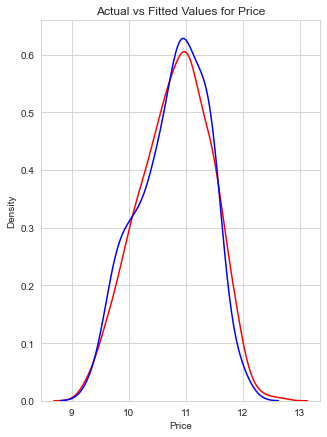

In [1415]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(testing, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()